In [52]:
import matplotlib.pyplot as plt
import numpy as np
from numpy.linalg import norm, inv
np.random.seed(0)

def U(N, X): 
    res = 0
    for i in range(N): 
        for j in range(N): 
            if(i == j): continue
            res += 1/rij(X[i], X[j])
            
    return 1/2 * res

def rij(x, y): 
    return np.sqrt((x[0] - y[0])**2 + (x[1] - y[1])**2 + (x[2] - y[2])**2)

def computeGrad(N, X): # returns gradient for each point
    gradient = np.zeros((N, 3))
    
    for k in range(N): 
        for i in range(N): 
            if(k == i): continue
            gradient[k,0] += -rij(X[k], X[i])**(-3) * (X[k,0] - X[i,0])
            gradient[k,1] += -rij(X[k], X[i])**(-3) * (X[k,1] - X[i,1])
            gradient[k,2] += -rij(X[k], X[i])**(-3) * (X[k,2] - X[i,2])
    
    return gradient

def experiment(N, ax): 
    X = np.random.randn(N,3)
    X /= np.sqrt(np.sum(X**2, axis=1)).reshape(-1,1)
    
    # get the descent
    maxIter = 500
    tol = 1e-4

    for _ in range(maxIter): 
        gradient = computeGrad(N,X) 
        if(norm(gradient) <= tol): break
        
        alpha, j = 1, 0
        next_X = X - alpha * gradient
        
        # back tracking line search
        while U(N, next_X) >= U(N, X) and j < 10:
            alpha *= 0.8
            next_X = X - alpha * gradient
            j += 1
            
        X -= alpha * gradient
        X /= np.sqrt(np.sum(X**2, axis=1)).reshape(-1,1) # projected
    
    # get the x
    ax.scatter(X[:,0], X[:,1], X[:,2])
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.set_title("N = {:d}".format(N))
#     ax.legend()
    return U(N,X)

## Problem 1

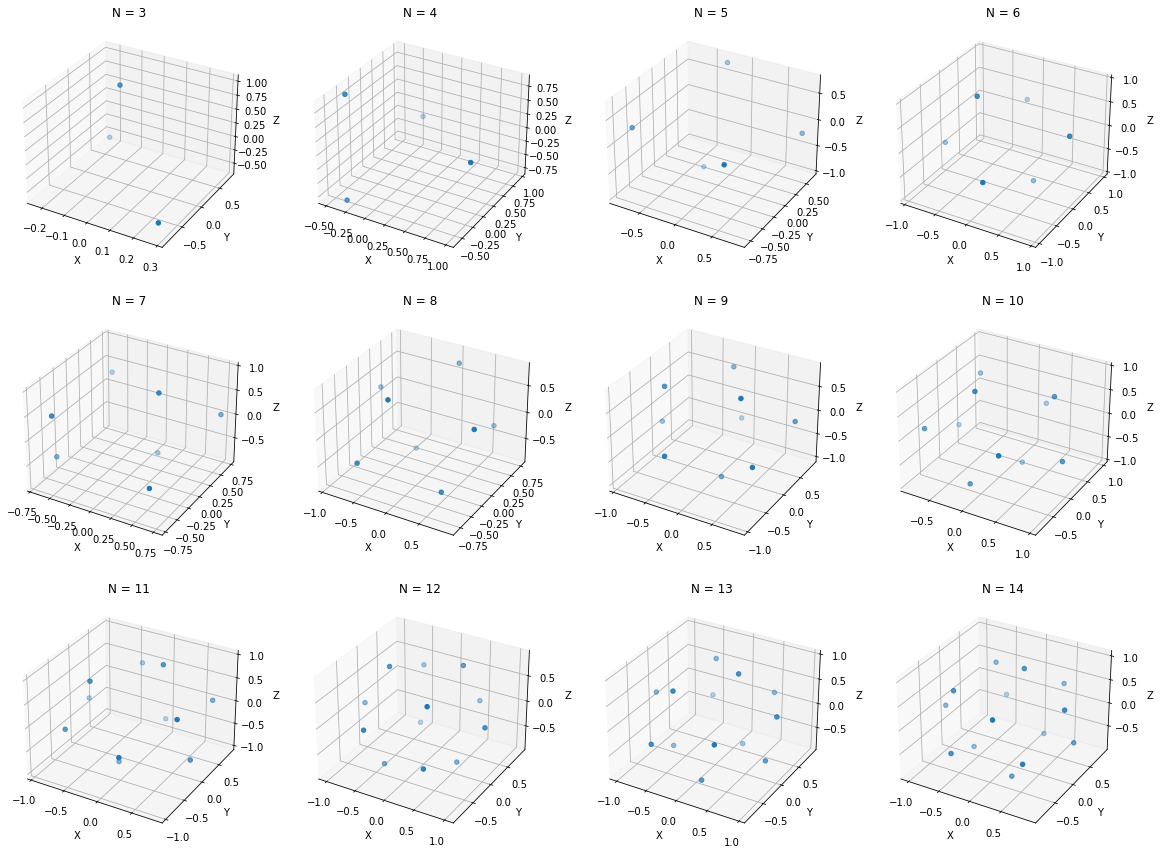

In [53]:
Us = []
fig = plt.figure(figsize = (20,15))
for i in range(12): 
    ax = fig.add_subplot(3,4,i+1, projection='3d')
    Us.append(experiment(i+3, ax))

The image above seems similar to https://tracer.lcc.uma.es/problems/thomson/thomson.html. Now, let's also use the approximation method mentioned in problem 3 to check N from 3-14. 

In [54]:
def Uapprox(N): 
    a, b = 1.10461, 0.137
    return (N**2/2)*(1-a*N**(-1/2)+b*N**(-3/2))

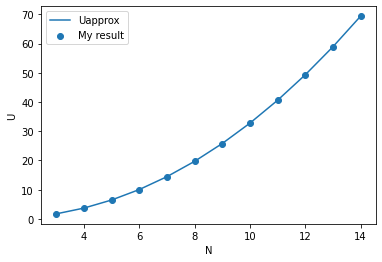

In [55]:
Ns = [N for N in range(3,15)]
Uapproxs = []
for N in Ns: 
    Uapproxs.append(Uapprox(N))

plt.plot(Ns, Uapproxs, label="Uapprox")
plt.scatter(Ns, Us, label="My result")
plt.xlabel('N')
plt.ylabel('U')
plt.legend()
plt.show()

Overall, the projected gradescent for the thomson problem from N=3 to N=14 seems to fit perfectly to the approximate values. It underlines that the fact that image from my code looks the same as the one in https://tracer.lcc.uma.es/problems/thomson/thomson.html

## Problem 2

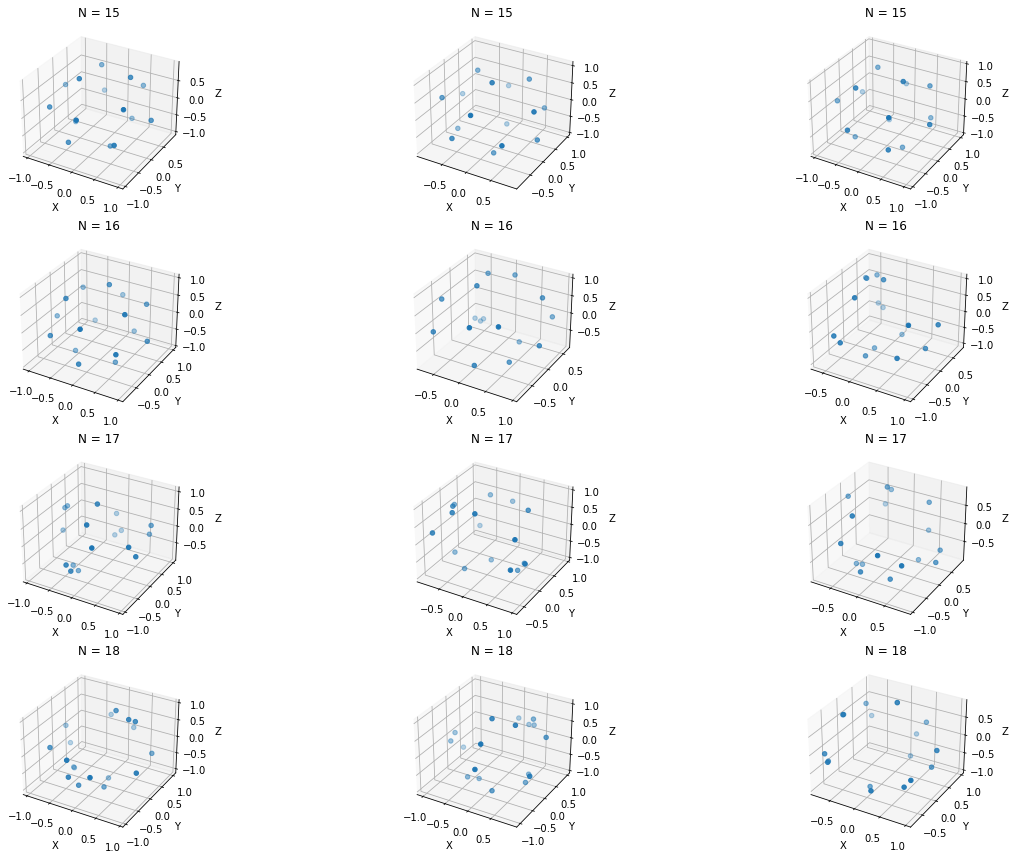

In [56]:
Us1 = []
Us2 = []
Us3 = []

fig = plt.figure(figsize = (20,15))

for i in range(4): 
    ax = fig.add_subplot(4,3,3*i+1, projection='3d')
    Us1.append(experiment(15+i, ax))
    
    ax = fig.add_subplot(4,3,3*i+2, projection='3d')
    Us2.append(experiment(15+i, ax))
    
    # add the last solver result of the different intiated position with same Ns in Us to be compared in problem 3
    ax = fig.add_subplot(4,3,3*i+3, projection='3d')
    Us3.append(experiment(15+i, ax)) 

For each row above, I show the thompsons result with three different random initial iterate from N=15 to N=18. As you can see, the final values seem to be quite different because they ends with differnet local minima. 

## Problem 3

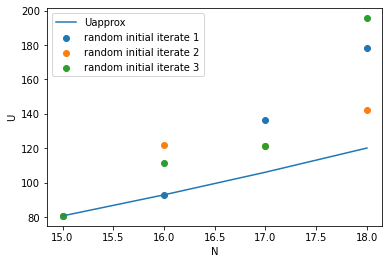

In [57]:
Ns = [N for N in range(15,19)]
Uapproxs = []
for N in Ns: 
    Uapproxs.append(Uapprox(N))

plt.plot(Ns, Uapproxs, label="Uapprox")
plt.scatter(Ns, Us1, label="random initial iterate 1")
plt.scatter(Ns, Us2, label="random initial iterate 2")
plt.scatter(Ns, Us3, label="random initial iterate 3")
plt.xlabel('N')
plt.ylabel('U')
plt.legend()
plt.show()

In [58]:
Us1[0], Us2[0], Us3[0]

(80.67024414211102, 80.67024411597228, 80.67024411429392)

They do not match as well as they did in Problem 1. Note that when N=15, they lies at the same point on the predicted minimum electrostatic potential as shown above. However, when N increases, the final value deviated as the initial iterate changes. 